# Normalization Test
This notebook scales the amplitude

## Imports
This notebook uses the custom code found in the code folder

In [1]:
import os

# math, processing, deep learning
import numpy as np
import tensorflow as tf
from scipy.signal import stft, istft

# visualization
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits.axes_grid1 import make_axes_locatable


# custom code
from code.stftprocessing import StftDataset
from code.dsvisual import DatasetVisualizer

# convenience
from tqdm import tqdm
import datetime


2023-04-21 19:32:41.223817: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Load the files for training and testing
There are different training and test sets in the folder. This section loads the appropriate ones into memory.


In [125]:
# this is a smaller training set for testing purposes
folder = "training/new_small"
base = "noisy_small"
target = "pure_small"

# this is a training set for training the main model
folder = "training/original training"
base = "noisy"
target = "pure"

test_folder = "training/test set"
test_base = "noisy_test"
test_target = "pure_test"


Load the files from the given locations using the custom code StftDataset class.

The StftDataset class also processes the waveforms into STFT format.

In [126]:
noisy_stft = StftDataset()
pure_stft = StftDataset()

noisy_stft.load(folder, base)
pure_stft.load(folder, target)

# test sets
noisy_test_stft = StftDataset()
pure_test_stft = StftDataset()
noisy_test_stft.load(test_folder, test_base)
pure_test_stft.load(test_folder, test_target)

Files loaded.
Files loaded.
Files loaded.
Files loaded.


In [127]:
# get the amplitudes of training and test sets
examples = noisy_stft.get_data()[:,:,:,:]
labels = pure_stft.get_data()[:,:,:,:]

In [128]:
t = noisy_stft.t
f = noisy_stft.f

## Get an example
Get an example from the noisy and clean datasets.

In [129]:
# set index of examples to get
index =0
# get examples from noisy and label set
test_example = examples[index]
label_example = labels[index]

## Process the example
Convert the data into complex-valued data and invert the STFT

In [130]:
# convert the amplitude and phase data into complex valued data
test_example_complex = test_example[:,:,0]*np.exp(1j* test_example[:,:,1])
label_example_complex = label_example[:,:,0]*np.exp(1j* label_example[:,:,1])

In [131]:
# invert the STFT data
t, wave = istft(test_example_complex, fs=5.)
t, wave_pure = istft(label_example_complex, fs=5.)

## Plot
Plot the results.

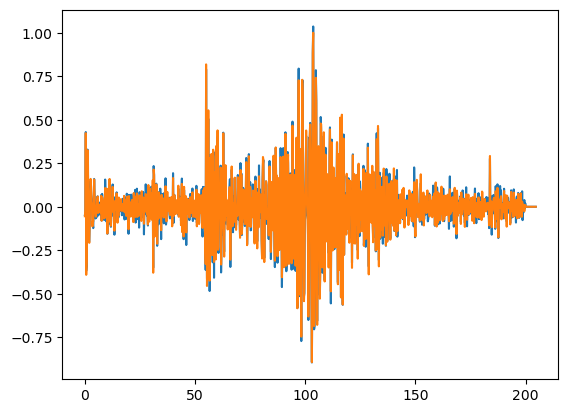

In [132]:
plt.plot(t, wave)
plt.plot(t, wave_pure)

## Filter 
Select only the amplitude values above threshold

In [133]:
amplitude_threshold = 0.01
filtered_example = np.where(test_example[:,:,0] > amplitude_threshold,test_example[:,:,0], 0)

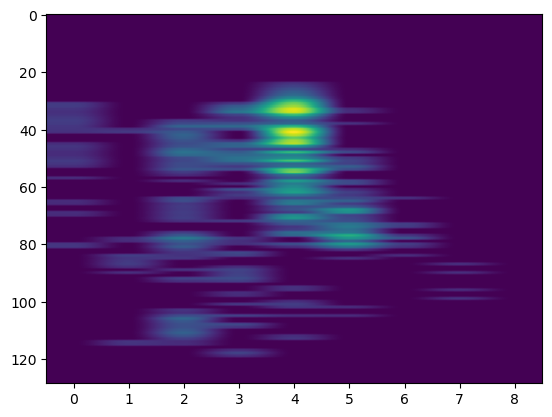

In [134]:
plt.imshow(filtered_example, aspect="auto")

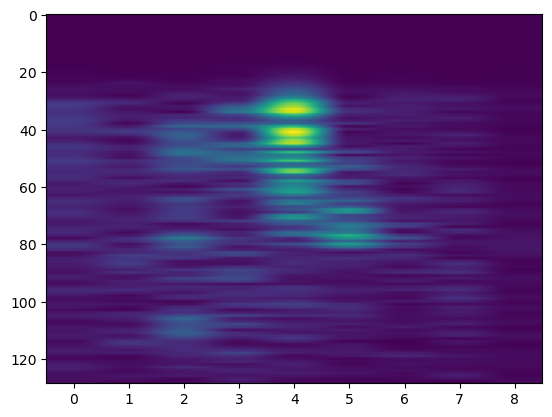

In [135]:
plt.imshow(test_example[:,:,0], aspect="auto")

In [136]:
filtered_example = np.where(test_example[:,:,0] > 0.0175,test_example[:,:,0], 0)

In [137]:
test_example_complex_filtered = filtered_example[:,:]*np.exp(1j* test_example[:,:,1])

In [138]:
test_example_complex.shape

(129, 9)

In [139]:
t, new_wave = istft(test_example_complex_filtered, fs=5.)

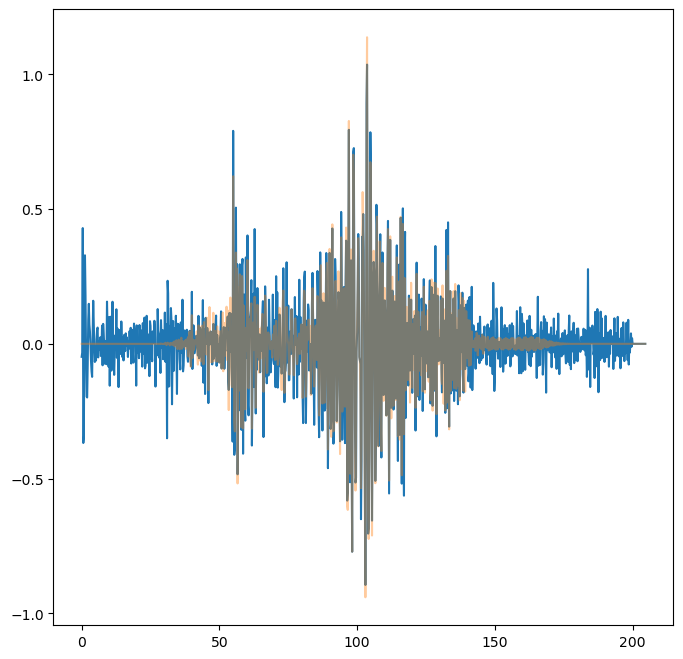

In [140]:
plt.figure(figsize=(8,8))
plt.plot(t, wave)
plt.plot(t, new_wave,alpha=0.4)


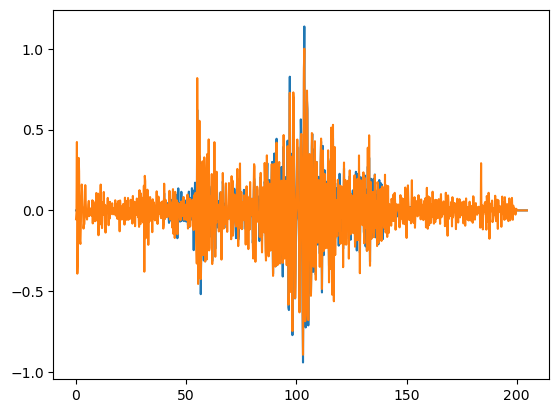

In [141]:
plt.plot(t, new_wave)
plt.plot(t, wave_pure)

In [142]:
maximum_amp =np.max(examples[:,:,:,0], axis=(-1,-2))

In [143]:
examples.shape

(430848, 129, 9, 2)

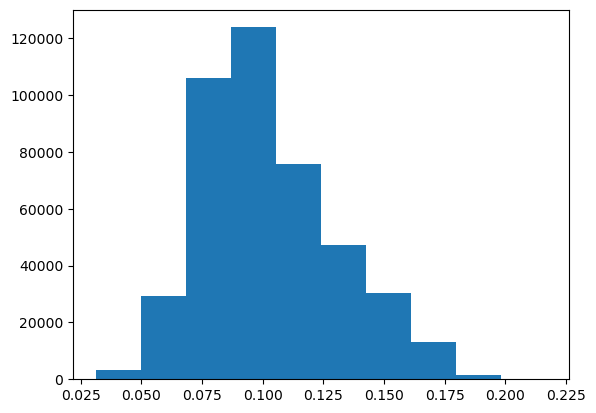

In [144]:
plt.hist(maximum_amp)
plt.show()

In [147]:
np.sqrt(np.var(maximum_amp))

0.02770448986446467